In [1]:
%matplotlib inline
import os
import numpy as np
import hashlib
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pytesseract
import pandas as pd

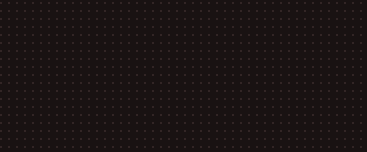

In [2]:
for root, dirs, files in os.walk('data'):
    if 'result.png' in files:
        img = Image.open(os.path.join(root, 'result.png'))
        break
img

In [3]:
h = hash(str(np.array(img)))
h

-1293343537

In [4]:
id_to_image = {}
hash_to_image = {}
hash_to_ids = {}
for root, dirs, files in os.walk('data'):
    if 'result.png' in files:
        img = Image.open(os.path.join(root, 'result.png'))
        id = os.path.basename(root)
        id_to_image[id] = img
        h = hashlib.md5(img.tobytes()).hexdigest()
        hash_to_image[h] = img
        if h not in hash_to_ids:
            hash_to_ids[h] = []
        hash_to_ids[h].append(id)

In [5]:
len(id_to_image), len(hash_to_image)

(319, 114)

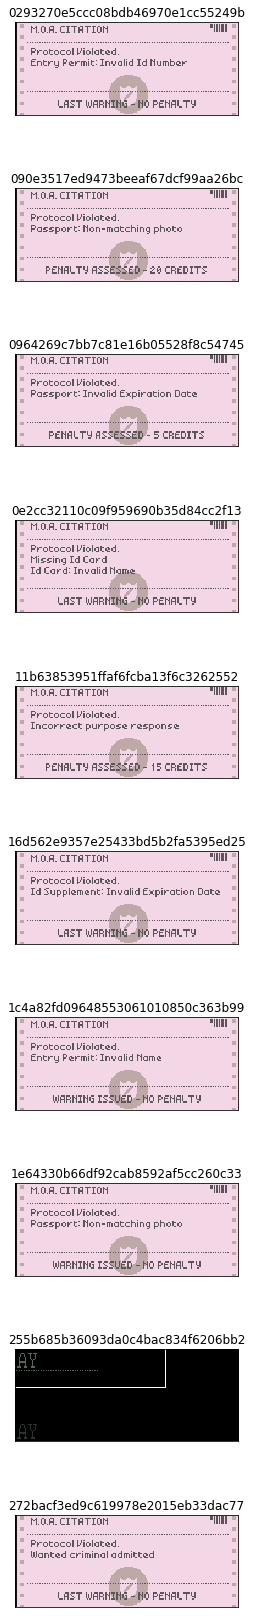

In [6]:
plt.figure(figsize=(4, 30))
display = 10
for i, k in enumerate(sorted(hash_to_image.keys())[:display]):
    plt.subplot(display, 1, i+1), plt.xticks([]), plt.yticks([]), plt.title(k), plt.imshow(hash_to_image[k]);

In [7]:
VIOLATIONS = [
    # entry permit
    'Entry Permit: Invalid Id Number',
    'Entry Permit: Invalid Expiration Date',
    'Entry Permit: Invalid Name',
    'Missing Entry Permit',
    'Forged Entry Permit',

    # passport
    'Missing Passport',
    'Passport: Invalid Gender',
    'Passport: Invalid Expiration Date',
    'Passport: Non-matching photo',
    'Passport: Invalid Issuing City',
    
    # id card
    'Missing Id Card',
    'Id Card: Invalid Birth Date',
    'Id Card: Non-matching photo',
    'Id Card: Invalid Weight',
    'Id Card: Invalid Height',
    'Id Card: Invalid Name',
    'Id Card: Invalid District',

    # id supplement
    'Missing Id Supplement',
    'Id Supplement: Invalid Expiration Date',
    'Id Supplement: Invalid Weight',
    'Id Supplement: Invalid Height',
    'Id Supplement: Invalid Thumbprint',
    'Id Supplement: Invalid Description',

    # responses
    'Incorrect purpose response',
    'Incorrect visit duration response',
    
    # Diplomatic
    'No Diplomatic Access to Arstotzka',
    'Diplomatic Auth: Invalid Name',
    'Diplomatic Auth: Invalid Id Number',
    'Forged Diplomatic Auth',

    # Work pass
    'Missing Work Pass',
    'Work Pass: Invalid Name',
    'Forged Work Pass',
    'Work Pass: Invalid Work End Date',

    # Wanted criminal
    'Wanted criminal admitted',
]

def find_violations(img):
    img = img.crop((20, 38, img.width-20, 112))
    data = ' '.join(pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)['text'])
    data = data.replace('Protocol Fiolated. ', '')
    data = data.replace('Protocol Hiolated. ', '')
    data = data.strip()
    data = data.replace('Trvalid', 'Invalid')
    data = data.replace('Humber', 'Number')
    data = data.replace('lleight', 'Weight')
    data = data.replace('llork', 'Work')
    data = data.replace('Hon-matching', 'Non-matching')
    data = data.replace('Inwalid eight', 'Invalid Weight')
    data = data.replace('Invalid ileight', 'Invalid Weight')
    data = data.replace('Ho Diplomatic Access', 'No Diplomatic Access')
    data = data.replace('!', ':')
    data = data.replace('Inwalid', 'Invalid')
    data = data.replace('Td Number', 'Id Number')
    data = data.replace('Invalid Lesuing City', 'Invalid Issuing City')
    data = data.replace('Td Supplement', 'Id Supplement')
    data = data.replace('Lgl humbprint', 'Invalid Thumbprint')
    data = data.replace('Invalid Jd Number', 'Invalid Id Number')
    data = data.replace('Invalid Nome', 'Invalid Name')
    data = data.replace('Invalid Hame', 'Invalid Name')
    data = data.strip()
    violations = [v for v in VIOLATIONS if v in data]
    for v in violations:
        data = data.replace(v, '')
    data = data.strip()
    for suffix in ('a,', ':', '.', ','):
        if data.endswith(suffix):
            data = data[:-len(suffix)].strip()
    data = data.strip()
    data = data.replace('  ', ' ')
    data = data.replace('Possible Smuqgler Admitted', '')
    data = data.replace('Possible Smuggler, Admitted', '')
    if len(data) > 0:
        raise Exception('exceeding text: "{}"'.format(data))
    return violations

[h for h, img in hash_to_image.items() if len(find_violations(img)) == 0]

['fc31124f8e4916df1bbce00a053c2b56', '255b685b36093da0c4bac834f6206bb2']

In [8]:
images = [(h, img) for h, img in hash_to_image.items() if len(find_violations(img)) == 0]

In [9]:
hash_count = {}
for img in id_to_image.values():
    h = hashlib.md5(img.tobytes()).hexdigest()
    hash_count[h] = hash_count.get(h, 0) + 1

In [10]:
hash_count

{'fc31124f8e4916df1bbce00a053c2b56': 119,
 '4ef8fcda84636b3610a50f3bc03c21e0': 5,
 'f2d2ab97134fd81a08c3f6e86c928fc6': 6,
 '090e3517ed9473beeaf67dcf99aa26bc': 1,
 '7b7baf8c601790736ddc4a094e0b8c55': 2,
 '3979494a8b0f5853b1e0d6ac861ee7cb': 1,
 '2e673c790ca4b72a6b701e513144879c': 1,
 'f73f64617de826bc463ea0ba34ccdbfa': 1,
 '5067e8ad9295f1c67f4622621a5f899b': 2,
 'ae4210e606ba7f6aed776bfef6104ada': 1,
 '9a8f1a58dabd18b32dbd3b6925b84193': 4,
 '2edc4ad78078694c0af96790195967a0': 5,
 '255b685b36093da0c4bac834f6206bb2': 4,
 '8e4be45f08cfac872c13d428ca6043e9': 2,
 '272bacf3ed9c619978e2015eb33dac77': 5,
 '4be70f8f1784f55c2a32c61811666976': 1,
 '277a191a09e03e9e900c712e9a5a155e': 1,
 '41f6e9e0dd0501bcf8b6e15724050e98': 3,
 'b9471136428e48cb9efd3ba3c7c8f769': 1,
 '277d36e5b67c4698e5db8f74de654172': 1,
 'bedf0df951be56603c0890b2422eac12': 1,
 '586f3ee7093d79974be1963a3efe38fb': 2,
 'f2ff2f7a5cfb5d5567f5856caee48a5a': 2,
 'b6accfb4a9a64d0805d70a45f1509092': 2,
 'e9b05b667d6899981c7176d81041cf53': 3

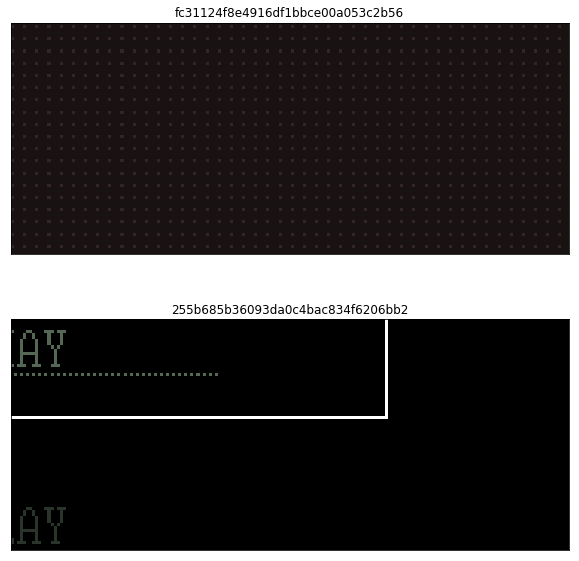

In [15]:
hashes = ['fc31124f8e4916df1bbce00a053c2b56', '255b685b36093da0c4bac834f6206bb2']


plt.figure(figsize=(10, 10))
for i, (h, img) in enumerate(images):
    plt.subplot(len(images), 1, 1+i), plt.title(h), plt.xticks([]), plt.yticks([]), plt.imshow(img)

In [16]:
hash_to_ids['255b685b36093da0c4bac834f6206bb2']

['0d7c05fa-c950-4798-a13f-aa753f6c711b',
 '6cf98dea-be82-440f-b593-0191202e9954',
 '8688c255-2996-44cf-8653-351800e96f8e',
 'c02393c0-e3c9-4849-8776-ba09234790c5']

In [18]:
for id in hash_to_ids['255b685b36093da0c4bac834f6206bb2']:
    del id_to_image[id]
del hash_to_image['255b685b36093da0c4bac834f6206bb2']
del hash_to_ids['255b685b36093da0c4bac834f6206bb2']

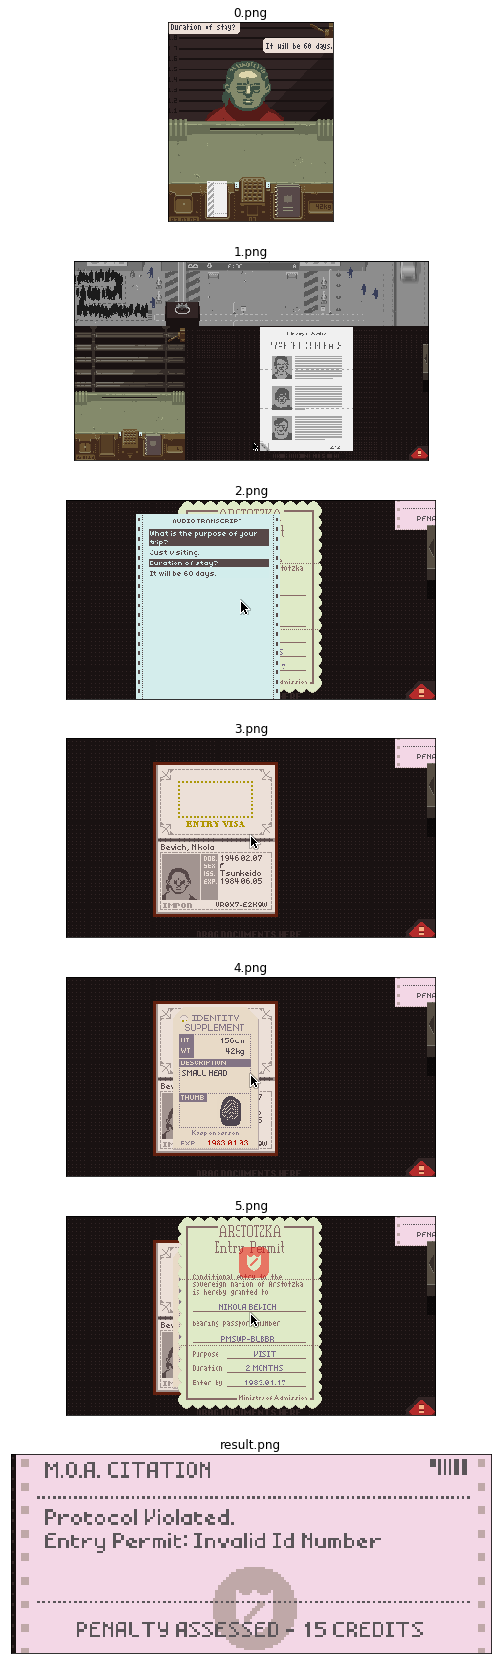

In [19]:
d = 'data/d1cf7290-48b5-4aff-8581-c72672fcb0d9'
plt.figure(figsize=(10, 30))
for root, dirs, files in os.walk(d):
    for i, f in enumerate(files):
        plt.subplot(len(files), 1, 1+i), plt.title(f), plt.xticks([]), plt.yticks([]), plt.imshow(Image.open(os.path.join(d, f)))

In [21]:
hash_to_violations = {}
for h, img in hash_to_image.items():
    hash_to_violations[h] = find_violations(img)

In [23]:
violation_counts = {}
no_violation_count = 0
for hash, ids in hash_to_ids.items():
    violations = hash_to_violations[hash]
    if len(violations) == 0:
        no_violation_count += len(ids)
    for violation in violations:
        violation_counts[violation] = violation_counts.get(violation, 0) + len(ids)

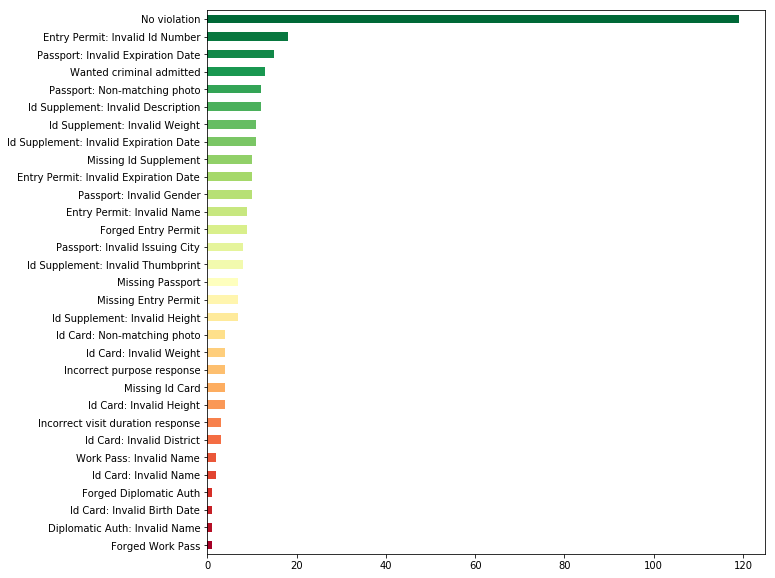

In [41]:
violation_counts['No violation'] = no_violation_count
plt.figure(figsize=(10, 10))
pd.Series(violation_counts).sort_values().plot(kind='barh', color=cm.RdYlGn(np.linspace(0,1,len(violation_counts))));